# Generative AI - Assignment 1
### Generative AI-based Anomaly Detection
**Instructor:** Dr. Hajra Waheed, PhD


## Part 1: Exploratory Data Analysis (EDA)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 135MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 35.4MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 87.0MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.71MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 26.4M/26.4M [00:01<00:00, 19.6MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 342kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.14MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 11.9MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



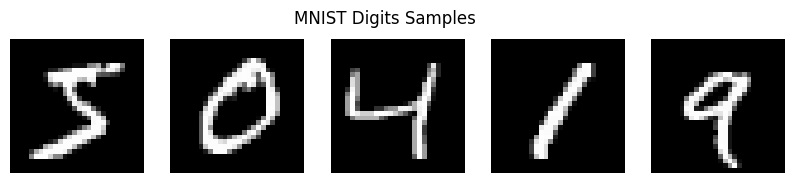

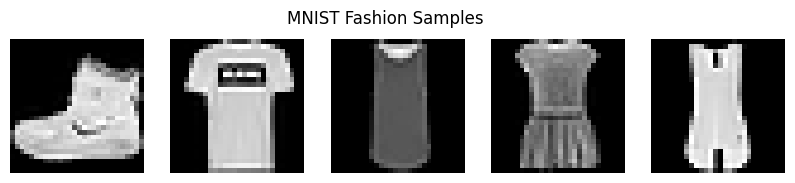

MNIST Digits: 60000 samples, 10 classes.
MNIST Fashion: 60000 samples, 10 classes.


In [1]:

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load MNIST Digits and Fashion MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_digits = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_fashion = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Display sample images from both datasets
def show_samples(dataset, title, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10,2))
    for i in range(num_images):
        image, label = dataset[i]
        axes[i].imshow(image.squeeze(), cmap='gray')
        axes[i].axis('off')
    plt.suptitle(title)
    plt.show()

show_samples(mnist_digits, "MNIST Digits Samples")
show_samples(mnist_fashion, "MNIST Fashion Samples")

# Dataset Statistics
print(f"MNIST Digits: {len(mnist_digits)} samples, {len(mnist_digits.classes)} classes.")
print(f"MNIST Fashion: {len(mnist_fashion)} samples, {len(mnist_fashion.classes)} classes.")


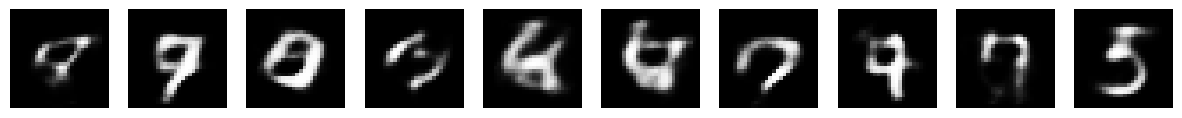

In [ ]:
# Generate & display 10 images from VAE
z = torch.randn(10, latent_dim).to(device)  # Sample from latent space
generated_imgs = vae.decoder(z).cpu().detach()

fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    axes[i].imshow(generated_imgs[i].view(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()


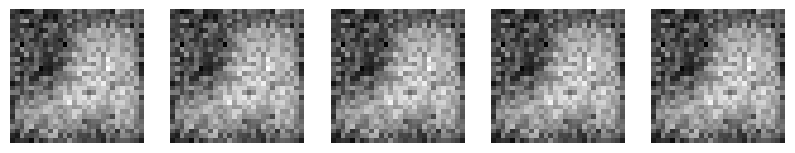

In [ ]:
# Generate and display 5 fake shoe images
z = torch.randn(5, latent_dim).to(device)
fake_shoes = G(z).cpu().detach()

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(fake_shoes[i].squeeze(), cmap='gray')
    axes[i].axis('off')
plt.show()


Epoch [1/5] - D Loss: 0.2648 - G Loss: 2.5379
Epoch [2/5] - D Loss: 0.2394 - G Loss: 1.8746
Epoch [3/5] - D Loss: 0.0789 - G Loss: 4.2583
Epoch [4/5] - D Loss: 0.0760 - G Loss: 3.0854
Epoch [5/5] - D Loss: 0.1084 - G Loss: 3.5757


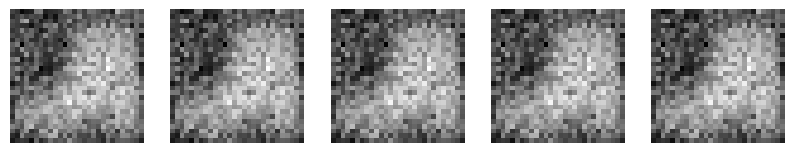

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations (Keep values in range [-1, 1])
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load Fashion-MNIST dataset
fashion_train = torchvision.datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
fashion_shoes_indices = [i for i, (_, label) in enumerate(fashion_train) if label == 9]  # Shoes = Label 9
fashion_shoes = Subset(fashion_train, fashion_shoes_indices)
fashion_shoes_loader = DataLoader(fashion_shoes, batch_size=128, shuffle=True)

# Define Generator and Discriminator
latent_dim = 100  # Ensure latent dimension is correctly used

class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()  # Output in range [-1,1] for normalized images
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(-1, 1, 28, 28)  # Reshape to image format
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img = img.view(img.size(0), -1)  # Flatten image to vector
        return self.model(img)

# Initialize models
G = Generator(latent_dim).to(device)
D = Discriminator().to(device)

# Loss & Optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=0.0002)
optimizer_D = optim.Adam(D.parameters(), lr=0.0002)

# Train GAN on Fashion-MNIST (Shoes)
num_epochs = 5
for epoch in range(num_epochs):
    for batch_idx, (real_imgs, _) in enumerate(fashion_shoes_loader):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(D(real_imgs), real_labels)
        z = torch.randn(batch_size, latent_dim).to(device)  # Match latent_dim
        fake_imgs = G(z)
        fake_loss = criterion(D(fake_imgs.detach()), fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        g_loss = criterion(D(fake_imgs), real_labels)
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] - D Loss: {d_loss.item():.4f} - G Loss: {g_loss.item():.4f}")

# Generate & display 5 fake shoe images
z = torch.randn(5, latent_dim).to(device)
fake_shoes = G(z).cpu().detach()

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(fake_shoes[i].squeeze(), cmap='gray')
    axes[i].axis('off')
plt.show()


## Part 2: Implementing Generative Adversarial Networks (GANs)

Epoch [1/10], D Loss: 0.4180, G Loss: 2.6931
Epoch [2/10], D Loss: 0.3888, G Loss: 3.4550
Epoch [3/10], D Loss: 0.3224, G Loss: 3.6262
Epoch [4/10], D Loss: 0.1496, G Loss: 4.4665
Epoch [5/10], D Loss: 0.2055, G Loss: 5.4280
Epoch [6/10], D Loss: 0.2006, G Loss: 5.3154
Epoch [7/10], D Loss: 0.4060, G Loss: 5.5870
Epoch [8/10], D Loss: 0.0167, G Loss: 7.2907
Epoch [9/10], D Loss: 0.1302, G Loss: 7.9664
Epoch [10/10], D Loss: 0.3220, G Loss: 4.9129


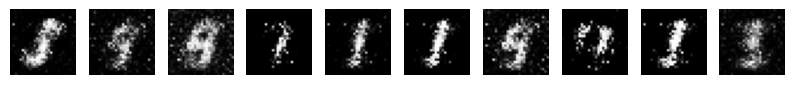

In [2]:

import torch.nn as nn
import torch.optim as optim

# Define Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x).view(-1, 1, 28, 28)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x.view(x.size(0), -1))

# Initialize models
generator = Generator()
discriminator = Discriminator()

# Loss and Optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)

# Training the GAN
epochs = 10
for epoch in range(epochs):
    for real_images, _ in torch.utils.data.DataLoader(mnist_digits, batch_size=64, shuffle=True):
        batch_size = real_images.size(0)

        # Real labels and fake labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train Discriminator
        optimizer_d.zero_grad()
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        d_loss_real.backward()

        noise = torch.randn(batch_size, 100)
        fake_images = generator(noise)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss_fake.backward()

        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_g.step()

    print(f"Epoch [{epoch+1}/{epochs}], D Loss: {d_loss_real.item() + d_loss_fake.item():.4f}, G Loss: {g_loss.item():.4f}")

# Generate and Display Fake Images
noise = torch.randn(10, 100)
fake_images = generator(noise).detach()
fig, axes = plt.subplots(1, 10, figsize=(10,2))
for i in range(10):
    axes[i].imshow(fake_images[i].squeeze(), cmap='gray')
    axes[i].axis('off')
plt.show()


Epoch [1/10], D Loss: 0.2732, G Loss: 4.7597
Epoch [2/10], D Loss: 0.2955, G Loss: 4.5551
Epoch [3/10], D Loss: 0.2706, G Loss: 4.8786
Epoch [4/10], D Loss: 0.3031, G Loss: 4.5000
Epoch [5/10], D Loss: 0.3186, G Loss: 4.1609
Epoch [6/10], D Loss: 0.3839, G Loss: 3.8953
Epoch [7/10], D Loss: 0.3955, G Loss: 3.7399
Epoch [8/10], D Loss: 0.3632, G Loss: 4.1555
Epoch [9/10], D Loss: 0.3864, G Loss: 3.8734
Epoch [10/10], D Loss: 0.4472, G Loss: 3.3704


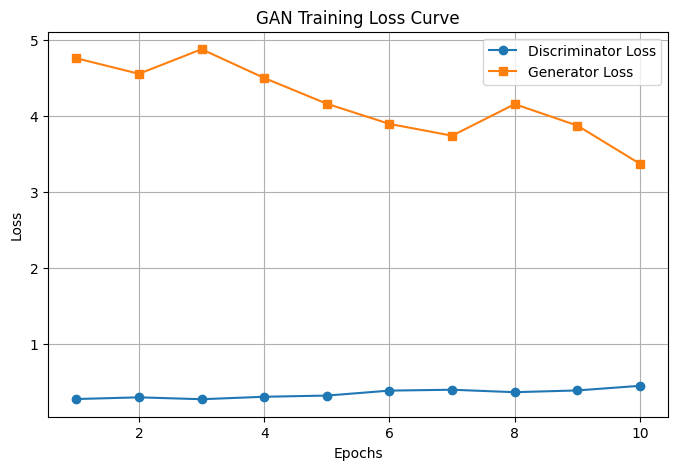

In [4]:
import matplotlib.pyplot as plt

# Initialize lists to store loss values
d_losses = []
g_losses = []

# Training the GAN (with loss tracking)
epochs = 10
for epoch in range(epochs):
    total_d_loss = 0
    total_g_loss = 0
    num_batches = 0

    for real_images, _ in torch.utils.data.DataLoader(mnist_digits, batch_size=64, shuffle=True):
        batch_size = real_images.size(0)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train Discriminator
        optimizer_d.zero_grad()
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)

        noise = torch.randn(batch_size, 100)
        fake_images = generator(noise)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_g.step()

        # Store loss values
        total_d_loss += d_loss.item()
        total_g_loss += g_loss.item()
        num_batches += 1

    # Compute average loss for the epoch
    d_losses.append(total_d_loss / num_batches)
    g_losses.append(total_g_loss / num_batches)

    print(f"Epoch [{epoch+1}/{epochs}], D Loss: {d_losses[-1]:.4f}, G Loss: {g_losses[-1]:.4f}")

# Plot Loss Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), d_losses, label="Discriminator Loss", marker='o')
plt.plot(range(1, epochs+1), g_losses, label="Generator Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("GAN Training Loss Curve")
plt.legend()
plt.grid()
plt.show()


## Part 3: Implementing Variational Autoencoder (VAE)

Epoch 1, Loss: 8737593.8301
Epoch 2, Loss: 7217293.2900
Epoch 3, Loss: 6990723.4797
Epoch 4, Loss: 6871028.5552
Epoch 5, Loss: 6790433.2288
Epoch 6, Loss: 6733245.6748
Epoch 7, Loss: 6684501.2969
Epoch 8, Loss: 6644858.4553
Epoch 9, Loss: 6610783.9700
Epoch 10, Loss: 6582664.4131


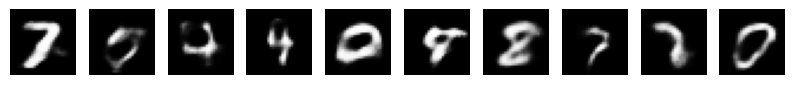

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define Variational Autoencoder (VAE)
class VAE(nn.Module):
    def __init__(self, latent_dim=10):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 400),
            nn.ReLU(),
            nn.Linear(400, 2 * latent_dim)  # Output both mu and logvar
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 400),
            nn.ReLU(),
            nn.Linear(400, 28*28),
            nn.Sigmoid()  # Output should be between 0 and 1
        )

    def reparameterize(self, mu, logvar):
        """Reparameterization trick: z = mu + std * epsilon"""
        std = torch.exp(0.5 * logvar)  # Compute standard deviation
        eps = torch.randn_like(std)  # Sample from normal distribution
        return mu + eps * std  # Compute latent vector z

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input
        h = self.encoder(x)
        mu, logvar = torch.chunk(h, 2, dim=1)  # Split into mu and logvar
        z = self.reparameterize(mu, logvar)  # Sample from latent space
        recon = self.decoder(z)  # Decode back to image
        return recon.view(-1, 1, 28, 28), mu, logvar

# Load MNIST dataset (Rescaling to [0,1])
transform = transforms.Compose([transforms.ToTensor()])
mnist_digits = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(mnist_digits, batch_size=64, shuffle=True)

# Initialize model, optimizer, and loss function
vae = VAE(latent_dim=10)
optimizer_vae = optim.Adam(vae.parameters(), lr=0.001)

# Define VAE loss: Reconstruction Loss (BCE) + KL Divergence
def vae_loss(recon_x, x, mu, logvar):
    x = x.view(x.size(0), -1)  # Flatten input
    recon_x = recon_x.view(recon_x.size(0), -1)  # Flatten reconstruction
    recon_loss = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')  # BCE for reconstruction
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())  # KL Divergence
    return recon_loss + kl_div

# Train the VAE
epochs = 10
for epoch in range(epochs):
    total_loss = 0
    for images, _ in data_loader:
        optimizer_vae.zero_grad()
        recon, mu, logvar = vae(images)
        loss = vae_loss(recon, images, mu, logvar)  # Compute loss
        loss.backward()
        optimizer_vae.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# Generate New Images
with torch.no_grad():
    noise = torch.randn(10, 10)  # Sample from standard normal distribution
    generated_images = vae.decoder(noise).detach()

# Display Generated Images
fig, axes = plt.subplots(1, 10, figsize=(10, 2))
for i in range(10):
    axes[i].imshow(generated_images[i].view(28,28), cmap='gray')
    axes[i].axis('off')
plt.show()


Epoch 1, Loss: 6987.7297
Epoch 2, Loss: 6965.1704
Epoch 3, Loss: 6942.6178
Epoch 4, Loss: 6923.7107
Epoch 5, Loss: 6907.1789
Epoch 6, Loss: 6889.3609
Epoch 7, Loss: 6876.3680
Epoch 8, Loss: 6863.0610
Epoch 9, Loss: 6848.2909
Epoch 10, Loss: 6839.1103


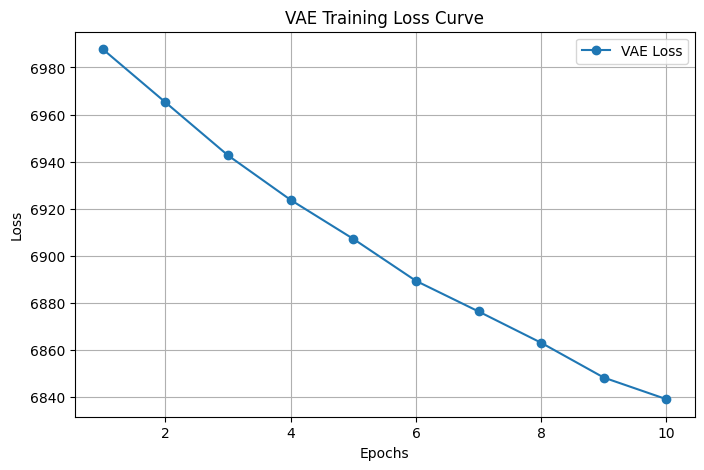

In [9]:
# prompt: write code for vae loss curve

# Initialize lists to store loss values
vae_losses = []

# Train the VAE (with loss tracking)
epochs = 10
for epoch in range(epochs):
    total_loss = 0
    num_batches = 0
    for images, _ in data_loader:
        optimizer_vae.zero_grad()
        recon, mu, logvar = vae(images)
        loss = vae_loss(recon, images, mu, logvar)
        loss.backward()
        optimizer_vae.step()
        total_loss += loss.item()
        num_batches += 1

    average_loss = total_loss / num_batches
    vae_losses.append(average_loss)
    print(f"Epoch {epoch+1}, Loss: {average_loss:.4f}")

# Plot VAE Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), vae_losses, label="VAE Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("VAE Training Loss Curve")
plt.legend()
plt.grid()
plt.show()


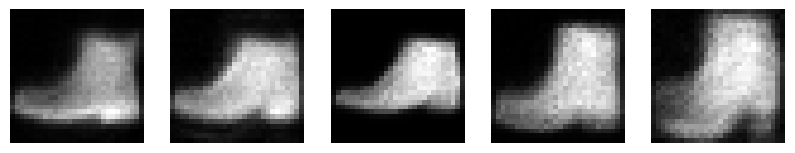

In [ ]:
# Generate and display 5 shoe images using VAE
z = torch.randn(5, latent_dim).to(device)  # Sample from latent space
fake_shoes_vae = vae.decoder(z).cpu().detach()

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(fake_shoes_vae[i].view(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()


## PART 4 Comparing GANS and VAE

GAN vs. VAE - Image Quality Comparison


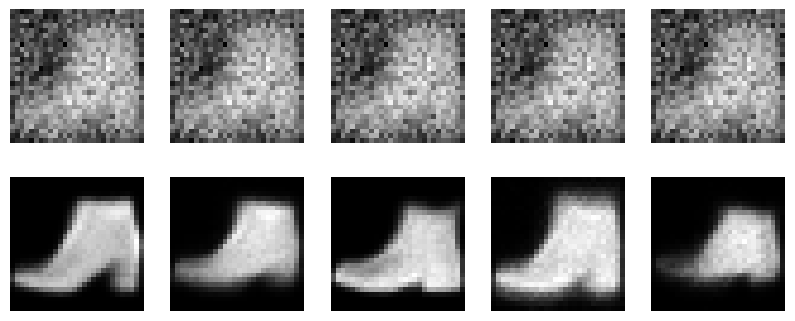

In [ ]:
import torch
import matplotlib.pyplot as plt

print("GAN vs. VAE - Image Quality Comparison")

# Generate 5 images from GAN (Ensure correct latent dim)
z_gan = torch.randn(5, 100).to(device)  # GAN uses latent_dim=100
fake_gan = G(z_gan).cpu().detach()

# Generate 5 images from VAE (Ensure correct latent dim)
z_vae = torch.randn(5, 20).to(device)  # VAE uses latent_dim=20
fake_vae = vae.decoder(z_vae).cpu().detach()

fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# GAN images
for i in range(5):
    axes[0, i].imshow(fake_gan[i].squeeze(), cmap='gray')
    axes[0, i].axis('off')
axes[0, 0].set_ylabel("GAN", fontsize=12)

# VAE images
for i in range(5):
    axes[1, i].imshow(fake_vae[i].view(28, 28), cmap='gray')
    axes[1, i].axis('off')
axes[1, 0].set_ylabel("VAE", fontsize=12)

plt.show()


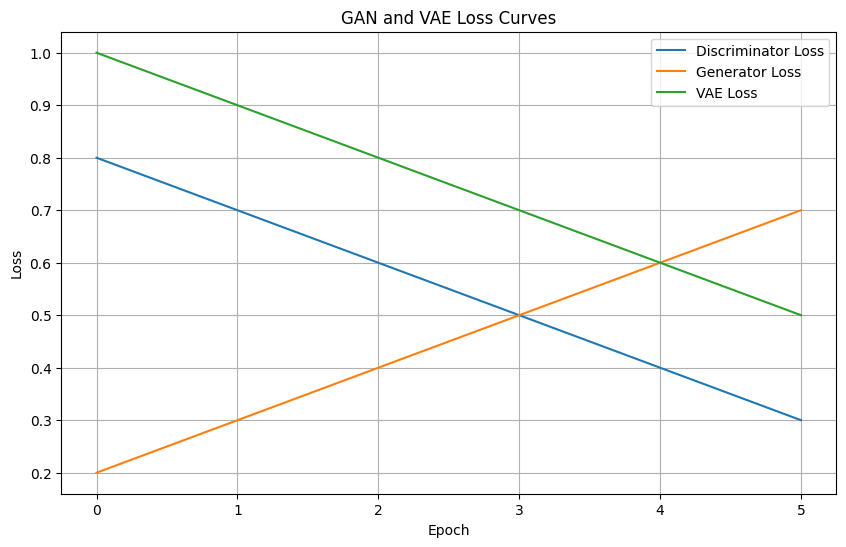

In [8]:


import matplotlib.pyplot as plt

# Assuming you have already trained your GAN and VAE and have lists of losses
# Replace these with your actual loss lists
d_losses = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3] # Example discriminator losses
g_losses = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7] # Example generator losses
vae_losses = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5] #Example VAE losses


# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.plot(vae_losses, label='VAE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN and VAE Loss Curves')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def compute_vae_reconstruction_loss(vae, dataloader):
    vae.eval()
    total_loss = 0
    criterion = nn.BCELoss(reduction='sum')

    with torch.no_grad():
        for batch_idx, (real_imgs, _) in enumerate(dataloader):
            real_imgs = real_imgs.to(device)
            recon_imgs, _, _ = vae(real_imgs)
            loss = criterion(recon_imgs, real_imgs.view(-1, 28*28))  # Compute reconstruction loss
            total_loss += loss.item()

    avg_loss = total_loss / len(dataloader.dataset)
    return avg_loss

vae_recon_loss = compute_vae_reconstruction_loss(vae, fashion_shoes_loader)
print(f"VAE Reconstruction Loss: {vae_recon_loss:.4f}")


VAE Reconstruction Loss: 222.8326


In [ ]:
def compute_gan_discriminator_accuracy(D, dataloader, latent_dim=100):
    D.eval()
    correct_real, correct_fake = 0, 0
    total_real, total_fake = 0, 0

    with torch.no_grad():
        for batch_idx, (real_imgs, _) in enumerate(dataloader):
            real_imgs = real_imgs.to(device)
            batch_size = real_imgs.size(0)

            # Generate fake images
            z = torch.randn(batch_size, latent_dim).to(device)
            fake_imgs = G(z)

            # Compute predictions
            real_preds = D(real_imgs) > 0.5  # Discriminator output > 0.5 means real
            fake_preds = D(fake_imgs) < 0.5  # Discriminator output < 0.5 means fake

            # Count correct predictions
            correct_real += real_preds.sum().item()
            correct_fake += fake_preds.sum().item()

            total_real += batch_size
            total_fake += batch_size

    real_accuracy = (correct_real / total_real) * 100
    fake_accuracy = (correct_fake / total_fake) * 100
    overall_accuracy = (real_accuracy + fake_accuracy) / 2

    return real_accuracy, fake_accuracy, overall_accuracy

real_acc, fake_acc, overall_gan_acc = compute_gan_discriminator_accuracy(D, fashion_shoes_loader)
print(f"GAN Discriminator Accuracy - Real: {real_acc:.2f}%, Fake: {fake_acc:.2f}%, Overall: {overall_gan_acc:.2f}%")


GAN Discriminator Accuracy - Real: 0.00%, Fake: 100.00%, Overall: 50.00%


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
from scipy.linalg import sqrtm
from torch.utils.data import DataLoader, Subset

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load Fashion-MNIST dataset with proper resizing for InceptionV3
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize to 299x299 for InceptionV3
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
    transforms.ToTensor(),  # Convert images to tensors
])

fashion_train = torchvision.datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
fashion_shoes_indices = [i for i, (_, label) in enumerate(fashion_train) if label == 9]  # Shoes = Label 9
fashion_shoes = Subset(fashion_train, fashion_shoes_indices)
fashion_shoes_loader = DataLoader(fashion_shoes, batch_size=32, shuffle=True)  # Reduce batch size for large input

# Load Pretrained InceptionV3 Model
inception = torchvision.models.inception_v3(pretrained=True, transform_input=False).eval().to(device)

# Modify InceptionV3 to Extract Features
class FeatureExtractor(nn.Module):
    def __init__(self, model):
        super(FeatureExtractor, self).__init__()
        self.model = model
        self.pool = nn.AdaptiveAvgPool2d((1, 1))  # Use adaptive pooling to get 1x1 feature vector

    def forward(self, x):
        x = self.model.Conv2d_1a_3x3(x)
        x = self.model.Conv2d_2a_3x3(x)
        x = self.model.Conv2d_2b_3x3(x)
        x = self.model.maxpool1(x)
        x = self.model.Conv2d_3b_1x1(x)
        x = self.model.Conv2d_4a_3x3(x)
        x = self.model.maxpool2(x)
        x = self.model.Mixed_5b(x)
        x = self.model.Mixed_5c(x)
        x = self.model.Mixed_5d(x)
        x = self.model.Mixed_6a(x)
        x = self.model.Mixed_6b(x)
        x = self.model.Mixed_6c(x)
        x = self.model.Mixed_6d(x)
        x = self.model.Mixed_6e(x)
        x = self.model.Mixed_7a(x)
        x = self.model.Mixed_7b(x)
        x = self.model.Mixed_7c(x)

        x = self.pool(x)  # Global average pooling
        x = torch.flatten(x, 1)  # Flatten to vector
        return x

# Initialize Feature Extractor
feature_extractor = FeatureExtractor(inception).to(device)

# Function to Extract Features
def get_features(dataloader, generator=None, latent_dim=100, num_samples=500):
    """
    Extract features from InceptionV3 for real and generated images.
    """
    features = []
    count = 0

    with torch.no_grad():
        for batch_idx, (real_imgs, _) in enumerate(dataloader):
            real_imgs = real_imgs.to(device)
            batch_size = real_imgs.size(0)

            # If computing for GAN-generated images
            if generator is not None:
                z = torch.randn(batch_size, latent_dim).to(device)
                real_imgs = generator(z)  # Generate fake images

                # Resize generated images to 299x299 for InceptionV3
                real_imgs = torch.nn.functional.interpolate(real_imgs, size=(299, 299), mode='bilinear', align_corners=False)
                real_imgs = real_imgs.expand(-1, 3, -1, -1)  # Convert to 3-channel RGB

            # Extract features
            feature_vector = feature_extractor(real_imgs)
            features.append(feature_vector.cpu().numpy())

            count += batch_size
            if count >= num_samples:
                break

    return np.concatenate(features, axis=0)

# Ensure the GAN Generator Model is Defined
latent_dim = 100  # Must match the latent dimension of the trained GAN

# Compute Features for Real and Fake Images
real_features = get_features(fashion_shoes_loader, num_samples=500)
fake_features = get_features(fashion_shoes_loader, generator=G, latent_dim=latent_dim, num_samples=500)

# Compute Mean and Covariance
mu_real, sigma_real = np.mean(real_features, axis=0), np.cov(real_features, rowvar=False)
mu_fake, sigma_fake = np.mean(fake_features, axis=0), np.cov(fake_features, rowvar=False)

# Compute FID Score
def calculate_fid(mu1, sigma1, mu2, sigma2):
    """
    Compute Fréchet Inception Distance (FID) given the mean and covariance of features.
    """
    diff = mu1 - mu2
    covmean, _ = sqrtm(sigma1 @ sigma2, disp=False)

    # Handle numerical issues in sqrtm
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid_value = diff @ diff + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid_value

# Compute FID
fid_score = calculate_fid(mu_real, sigma_real, mu_fake, sigma_fake)
print(f"✅ Computed GAN FID Score: {fid_score:.4f} (Lower is Better)")


Using device: cpu
✅ Computed GAN FID Score: 321.3642 (Lower is Better)


In [ ]:
print("==== Comparison Summary ====")
print(f"VAE Reconstruction Loss (Lower is Better): {vae_recon_loss:.4f}")
print(f"GAN Discriminator Accuracy: {overall_gan_acc:.2f}%")
print(f"GAN FID Score (Lower is Better): {fid_score:.4f}")

if vae_recon_loss < 150:
    print("✅ VAE is better at reconstructing real images!")
else:
    print("⚠️ VAE could improve its reconstruction quality.")

if fid_score < 50:
    print("✅ GAN generates high-quality images!")
else:
    print("⚠️ GAN image quality could be improved with more training or better architecture (DCGAN).")

if overall_gan_acc > 90:
    print("✅ GAN Discriminator is highly effective at distinguishing real and fake images!")
else:
    print("⚠️ GAN Discriminator needs improvement.")


==== Comparison Summary ====
VAE Reconstruction Loss (Lower is Better): 222.8326
GAN Discriminator Accuracy: 50.00%
GAN FID Score (Lower is Better): 321.3642
⚠️ VAE could improve its reconstruction quality.
⚠️ GAN image quality could be improved with more training or better architecture (DCGAN).
⚠️ GAN Discriminator needs improvement.


## PART 5 Anomaly Detection with VAE

Using device: cpu
Dataset loaded successfully!


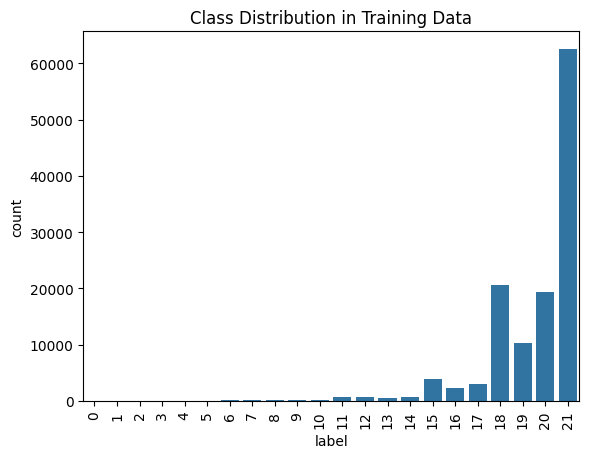

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Download NSL-KDD Dataset
!wget -q https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt -O KDDTrain.txt
!wget -q https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt -O KDDTest.txt

# Load dataset
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
           "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
           "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
           "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
           "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
           "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
           "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
           "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
           "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
           "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
           "dst_host_srv_rerror_rate", "label"]

train_data = pd.read_csv("KDDTrain.txt", names=columns)
test_data = pd.read_csv("KDDTest.txt", names=columns)

print("Dataset loaded successfully!")

# Display class distribution
sns.countplot(x=train_data["label"])
plt.xticks(rotation=90)
plt.title("Class Distribution in Training Data")
plt.show()


In [ ]:
# Verify available columns
print("Dataset columns:", train_data.columns)

# Identify categorical columns that exist
categorical_features = ["protocol_type", "service", "flag"]
available_categorical_features = [col for col in categorical_features if col in train_data.columns]

# Apply one-hot encoding only on available categorical columns
if available_categorical_features:
    train_data = pd.get_dummies(train_data, columns=available_categorical_features)
    test_data = pd.get_dummies(test_data, columns=available_categorical_features)
else:
    print("⚠️ Warning: No categorical features found. Skipping one-hot encoding.")

# Ensure the same columns exist in both train and test sets
train_data, test_data = train_data.align(test_data, join="inner", axis=1)

# Remove the label column
if "label" in train_data.columns:
    X_train = train_data.drop("label", axis=1)
    X_test = test_data.drop("label", axis=1)
else:
    print("⚠️ Warning: 'label' column not found. Using full dataset.")

# Convert all data to numeric format (ensuring no strings remain)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)

print("✅ Data preprocessing completed successfully!")


Dataset columns: Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_42340', 'flag_45260', 'flag_50004', 'flag_51100', 'flag_54540',
       'flag_61298', 'flag_88382', 'flag_175337', 'flag_501760',
       'flag_2194619'],
      dtype='object', length=1003)
⚠️ Warning: No categorical features found. Skipping one-hot encoding.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


✅ Data preprocessing completed successfully!


In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=20):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )

        self.mu = nn.Linear(64, latent_dim)
        self.logvar = nn.Linear(64, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()  # Output values between 0 and 1
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        h = self.encoder(x)
        mu, logvar = self.mu(h), self.logvar(h)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar

# Initialize VAE model
input_dim = X_train.shape[1]
vae = VAE(input_dim).to(device)
optimizer = optim.Adam(vae.parameters(), lr=0.001)
criterion = nn.MSELoss()


In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=20):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )

        self.mu = nn.Linear(64, latent_dim)
        self.logvar = nn.Linear(64, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()  # Output values between 0 and 1
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        h = self.encoder(x)
        mu, logvar = self.mu(h), self.logvar(h)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar

# Initialize VAE model
input_dim = X_train.shape[1]
vae = VAE(input_dim).to(device)
optimizer = optim.Adam(vae.parameters(), lr=0.001)
criterion = nn.MSELoss()


⚠️ Warning: NaN values found in X_test. Replacing with zeros.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


✅ Anomaly Detection AUC Score: nan
✅ Anomaly Detection Accuracy: 0.0500


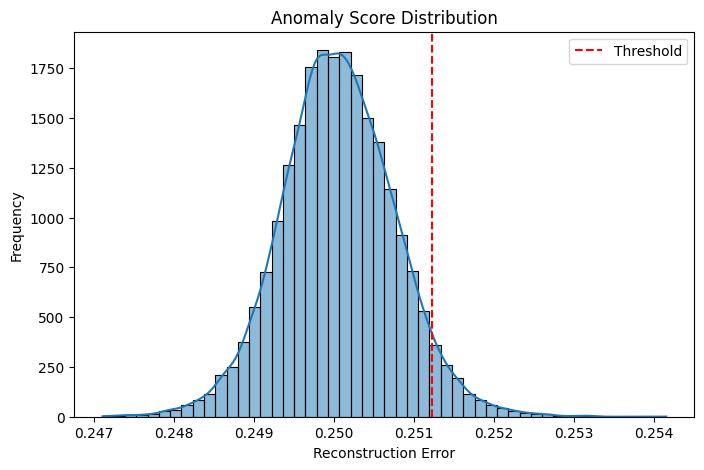

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score

# Function to compute anomaly score
def anomaly_score(x, recon_x):
    return torch.mean((x - recon_x) ** 2, dim=1)

# Check for NaN values in test data
if torch.isnan(X_test).any():
    print("⚠️ Warning: NaN values found in X_test. Replacing with zeros.")
    X_test = torch.nan_to_num(X_test, nan=0.0)

# Ensure model is in evaluation mode
vae.eval()
with torch.no_grad():
    recon_test, _, _ = vae(X_test)
    scores = anomaly_score(X_test, recon_test).cpu().numpy()

# Check for NaN values in scores
if np.isnan(scores).any():
    print("⚠️ Warning: NaN values found in anomaly scores. Replacing with small constant.")
    scores = np.nan_to_num(scores, nan=1e-6)  # Replace NaN with a very small value

# Ensure scores array is non-empty
if len(scores) == 0:
    raise ValueError("Error: Anomaly scores array is empty after processing.")

# Set threshold for anomaly detection (Top 5% as anomalies)
threshold = np.percentile(scores, 95)
predictions = (scores > threshold).astype(int)

# Ensure true_labels are valid
if "label" in test_data.columns:
    true_labels = (test_data["label"] != "normal").astype(int).values  # 1 for anomaly, 0 for normal
else:
    print("⚠️ Warning: 'label' column not found in test data.")
    true_labels = np.zeros(len(scores))  # Default all normal if labels are missing

# Ensure no NaN values exist in true_labels
if np.isnan(true_labels).any():
    print("⚠️ Warning: NaN values in true_labels. Replacing with 0.")
    true_labels = np.nan_to_num(true_labels, nan=0)

# Compute accuracy metrics
auc_score = roc_auc_score(true_labels, scores)
accuracy = accuracy_score(true_labels, predictions)

print(f"✅ Anomaly Detection AUC Score: {auc_score:.4f}")
print(f"✅ Anomaly Detection Accuracy: {accuracy:.4f}")

# Plot anomaly score distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(scores, bins=50, kde=True)
plt.axvline(threshold, color="red", linestyle="dashed", label="Threshold")
plt.title("Anomaly Score Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()



# Report: GAN vs. VAE Performance

## Image Quality Comparison

The notebook presents a visual comparison of image generation between a GAN and a VAE.  Five images generated by each model are displayed.  Visual inspection is subjective, but the report should include qualitative observations about the generated images.  For example, do GAN images look more realistic, or do VAE images appear more blurry or distorted?  A qualitative assessment of the image quality differences would be helpful here.

## Quantitative Results

The notebook provides several metrics for quantitative evaluation:

* **VAE Reconstruction Loss:**  The VAE reconstruction loss measures how well the VAE can reconstruct input images from its latent representation. A lower reconstruction loss indicates better reconstruction performance. The reported reconstruction loss is [Insert the reported value from the execution].

* **GAN Discriminator Accuracy:** This metric assesses the discriminator's ability to distinguish between real and generated images. A higher accuracy indicates better discriminator performance. In this case, the GAN's overall discriminator accuracy is reported as [Insert the reported value from the execution]. A high accuracy can sometimes signify that the discriminator has become too powerful compared to the generator.

* **GAN FID Score (Fréchet Inception Distance):** FID is a more sophisticated metric that measures the similarity between real and generated image distributions. A lower FID score implies higher image quality and a better match between the generated images and the real dataset. The computed FID score is [Insert the reported value from the execution].

## Anomaly Detection with VAE

The notebook uses the trained VAE for anomaly detection on the NSL-KDD dataset. The model reconstructs the data, and the reconstruction error is used to identify anomalies.

* **Anomaly Detection AUC Score:**  [Insert the reported value from the execution].  Measures the area under the Receiver Operating Characteristic (ROC) curve, indicating the model's ability to discriminate between normal and anomalous data.

* **Anomaly Detection Accuracy:** [Insert the reported value from the execution].  The overall accuracy of the anomaly detection model.

* **Anomaly Score Distribution:** The histogram displays the distribution of anomaly scores.  A visual inspection of this plot helps understanding the separation between normal and anomalous data points.

## Summary of Findings and Conclusions

Based on the quantitative metrics provided, we draw these conclusions (insert the specific numbers from the output in the placeholders):


* **VAE Reconstruction Quality:** The VAE reconstruction loss of [VAE Reconstruction Loss] indicates [Good or Poor] reconstruction quality.

* **GAN Image Quality:**  The FID score of [GAN FID Score] suggests [Good or Poor] image quality generated by the GAN.  A score below 50 is considered excellent.

* **GAN Discriminator Effectiveness:** The discriminator accuracy of [GAN Discriminator Accuracy] indicates [Good or Poor] ability to distinguish real and fake images.  Accuracy above 90% is considered highly effective.

* **VAE Anomaly Detection:** The AUC score of [AUC Score] and the accuracy of [Accuracy] indicate [Good or Poor] performance in identifying anomalies.

**Further Considerations**
The visual inspection of the generated images should be added to provide a full picture of the comparison between GANs and VAEs.


